<a href="https://colab.research.google.com/github/DJCordhose/ml-workshop/blob/master/notebooks/tf2/time-series-analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting Time Series data

* Idea and some code taken from, and also OPSD time series data set explained here: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
* Some code and approaches from: https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
* Nice tutorial: https://www.tensorflow.org/beta/tutorials/text/time_series

In [0]:
import pandas as pd
import numpy as np

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
# plt.xkcd()
plt.style.use('ggplot')

## Standard Case: explicit time stamp

* each entry belongs to one time stamp
* we just have a sequence of events

In [0]:
# pd.read_csv?

In [0]:
# for local
# url = 'opsd_germany_daily.csv'

# for colab
url = 'https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'

time_series_df = pd.read_csv(url, 
                             sep=',', 
                             index_col=0, # you can use the date as the index for pandas
                             parse_dates=[0]) # where is the time stamp?

In [5]:
time_series_df.shape

(4383, 4)

In [6]:
time_series_df.dtypes

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [0]:
# time_series_df.plot?

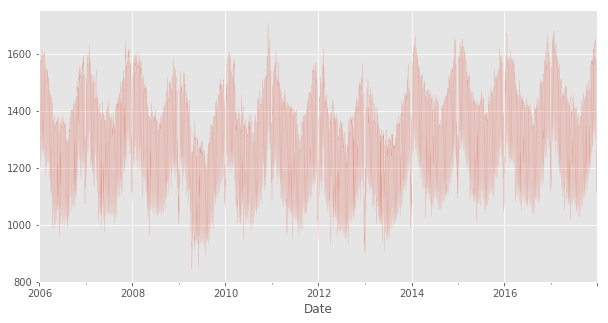

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 5))
time_series_df['Consumption'].plot(linewidth=0.1);

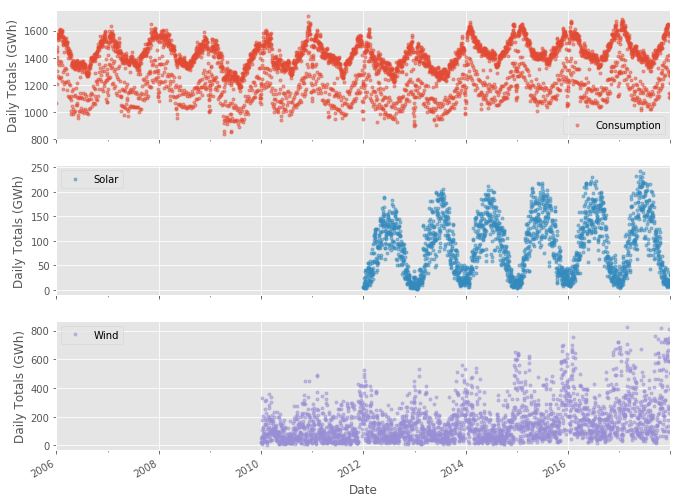

In [9]:
cols_plot = ['Consumption', 'Solar', 'Wind']

axes = time_series_df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

In [10]:
time_series_df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [11]:
time_series_df.tail()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


In [12]:
time_series_df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


## Using timestamps as the index we can do some nice queries

In [13]:
# just january 2017
time_series_df['2017-01'].head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-01-01,1130.413,307.125,35.291,342.416
2017-01-02,1441.052,295.099,12.479,307.578
2017-01-03,1529.990,666.173,9.351,675.524
2017-01-04,1553.083,686.578,12.814,699.392
2017-01-05,1547.238,261.758,20.797,282.555


In [14]:
# exactly what you think it does
time_series_df['2017-01-01': '2017-01-05']

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-01-01,1130.413,307.125,35.291,342.416
2017-01-02,1441.052,295.099,12.479,307.578
2017-01-03,1529.990,666.173,9.351,675.524
2017-01-04,1553.083,686.578,12.814,699.392
2017-01-05,1547.238,261.758,20.797,282.555


In [15]:
df_2017 = time_series_df['2017']
df_2017.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-01-01,1130.413,307.125,35.291,342.416
2017-01-02,1441.052,295.099,12.479,307.578
2017-01-03,1529.990,666.173,9.351,675.524
2017-01-04,1553.083,686.578,12.814,699.392
2017-01-05,1547.238,261.758,20.797,282.555


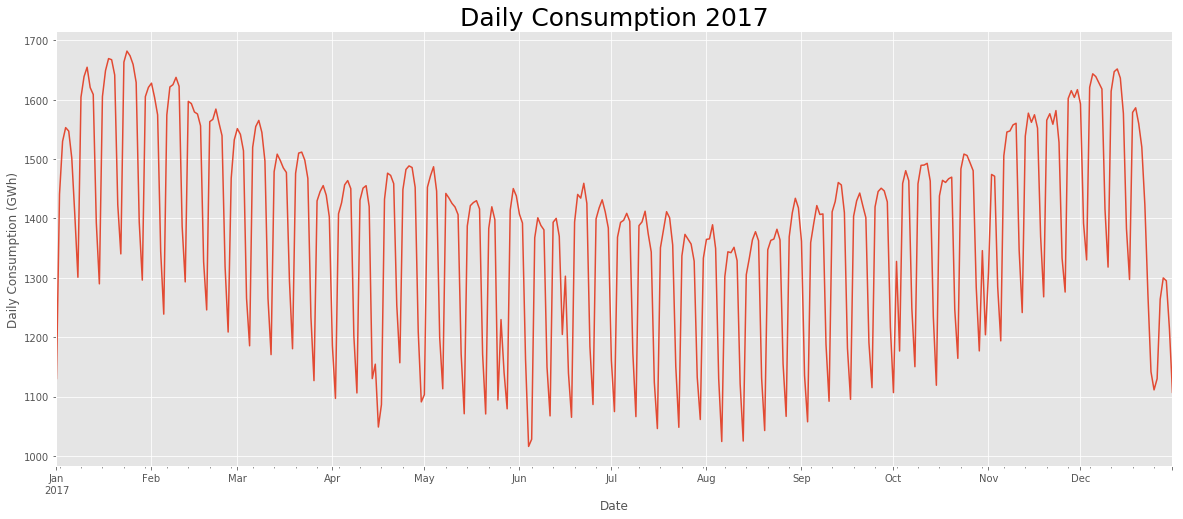

In [16]:
df_2017['Consumption'].plot(figsize=(20, 8))
plt.ylabel('Daily Consumption (GWh)')
plt.title('Daily Consumption 2017', fontsize=25);

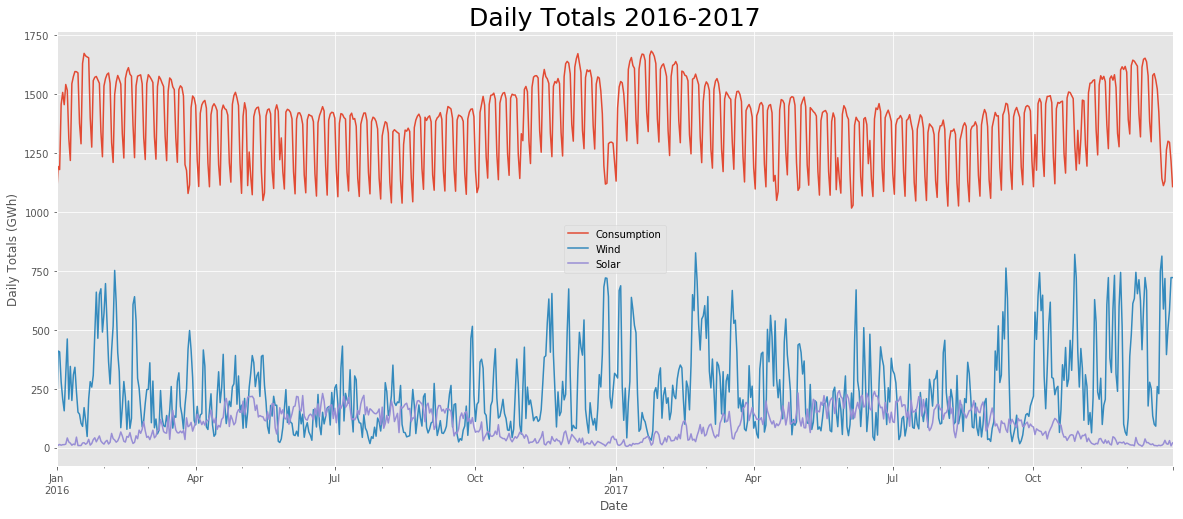

In [17]:
time_series_df['2016':'2017'][['Consumption', 'Wind', 'Solar']].plot(figsize=(20, 8));
plt.ylabel('Daily Totals (GWh)')
plt.title('Daily Totals 2016-2017', fontsize=25);

## Some Analyses

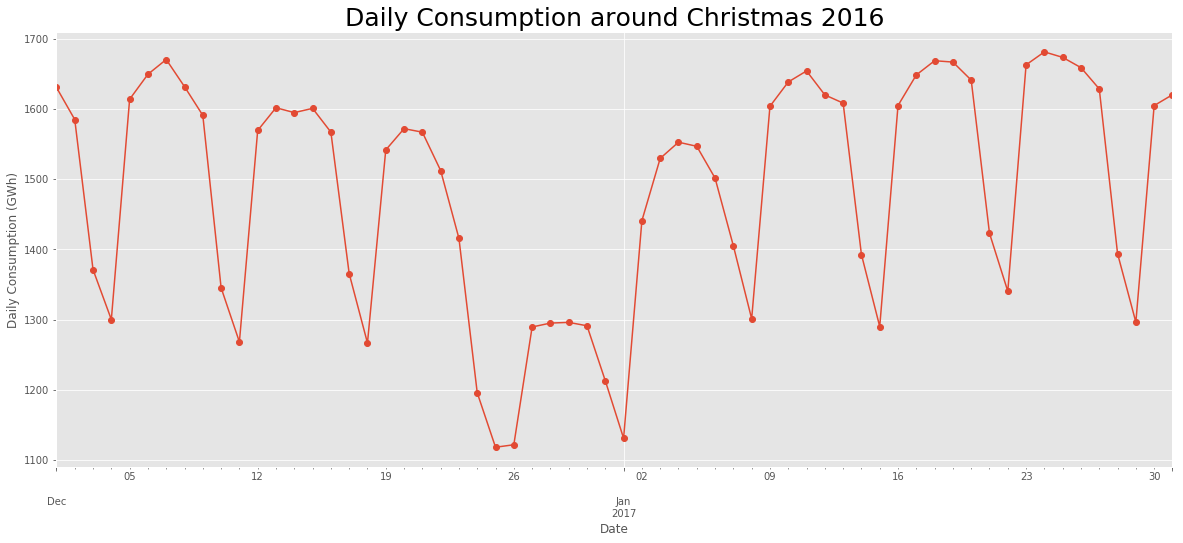

In [18]:
time_series_df['2016-12':'2017-1']['Consumption'].plot(marker='o', figsize=(20, 8))
plt.ylabel('Daily Consumption (GWh)')
plt.title('Daily Consumption around Christmas 2016', fontsize=25);

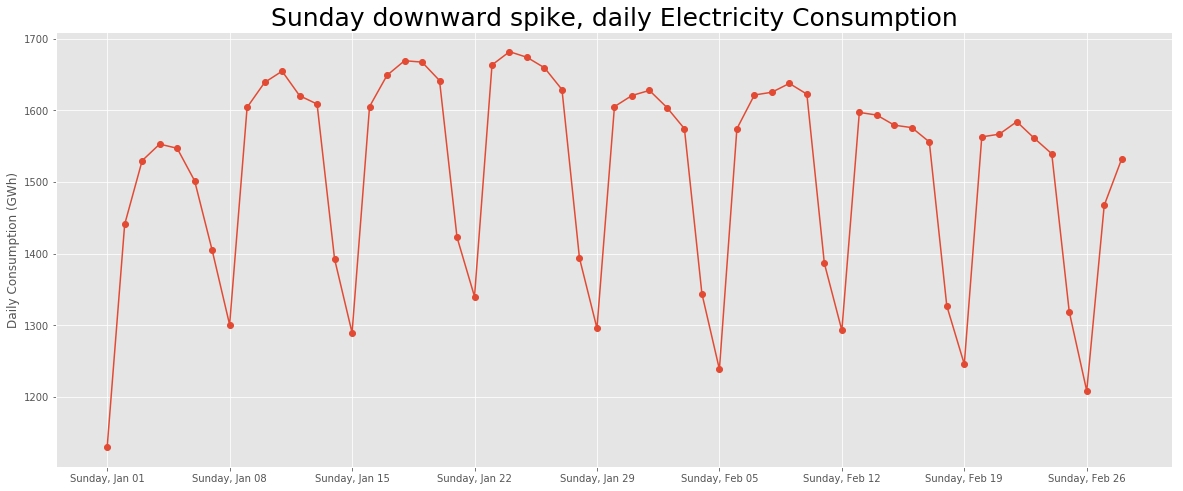

In [19]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(20, 8))
ax.grid(True)
ax.plot(time_series_df['2017-01':'2017-02']['Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Sunday downward spike, daily Electricity Consumption', fontsize=25)
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SUNDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('Sunday, %b %d'));

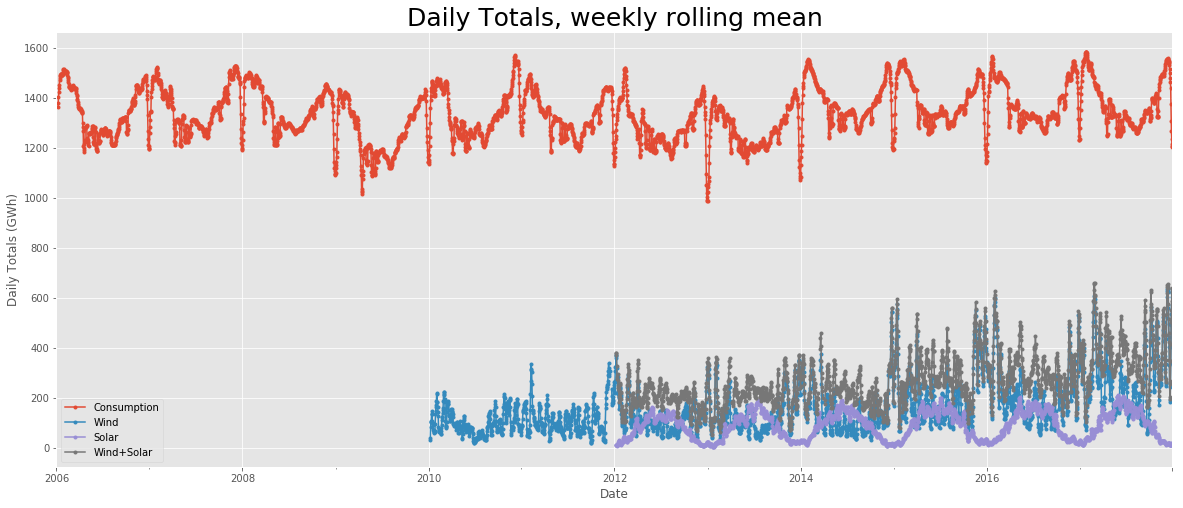

In [20]:
opsd_7d = time_series_df.rolling(7).mean()
opsd_7d.plot(marker='.', figsize=(20, 8))
plt.ylabel('Daily Totals (GWh)')
plt.title('Daily Totals, weekly rolling mean', fontsize=25);

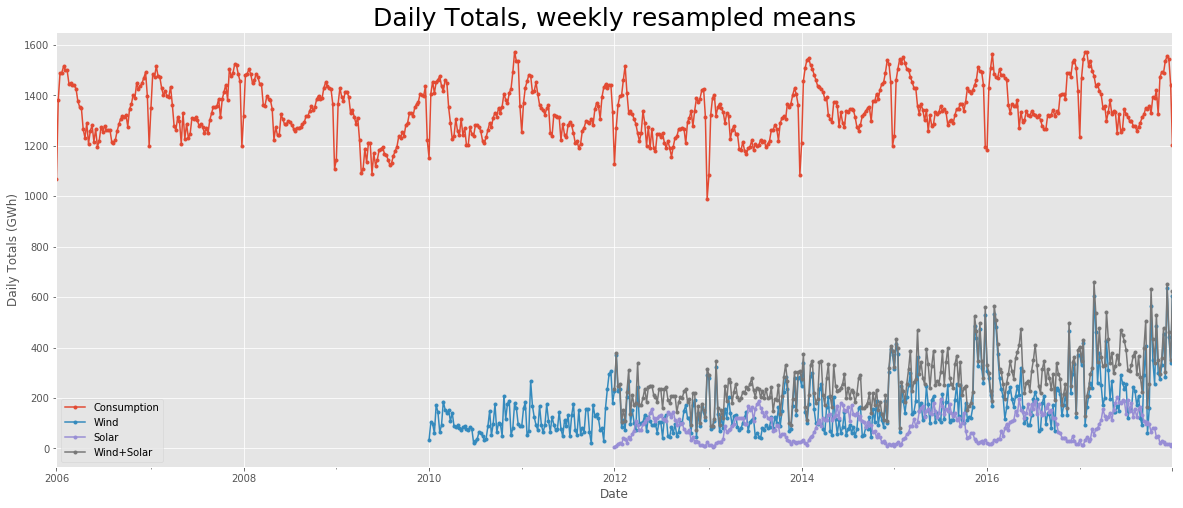

In [21]:
# alternative style of doing this
opsd_weekly_mean = time_series_df.resample('W').mean()
opsd_weekly_mean.plot(marker='.', figsize=(20, 8))
plt.ylabel('Daily Totals (GWh)')
plt.title('Daily Totals, weekly resampled means', fontsize=25);


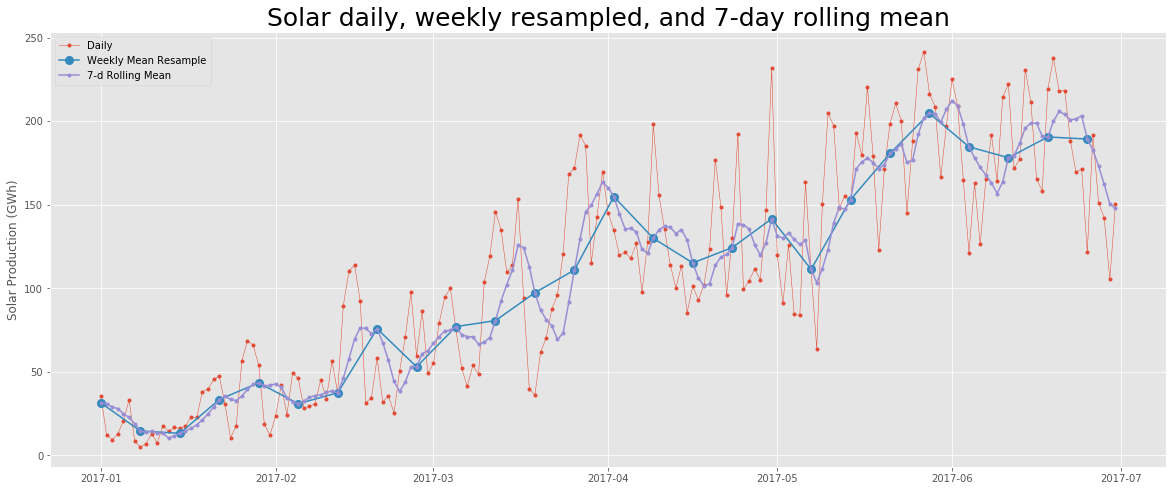

In [22]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time_series_df[start:end]['Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(opsd_7d.loc[start:end, 'Solar'],
marker='.', linestyle='-', label='7-d Rolling Mean')
ax.set_ylabel('Solar Production (GWh)')
ax.set_title('Solar daily, weekly resampled, and 7-day rolling mean', fontsize=25)
ax.legend();

## Statistical Methods directly geared towards forecasting

* https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
* https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b#targetText=Time%20series%20forecasting%20is%20the,forecasting%20retail%20sales%20time%20series.
* https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

In [0]:
# https://www.statsmodels.org
import statsmodels.api as sm

In [0]:
decomposition = sm.tsa.seasonal_decompose(time_series_df['2017']['Consumption'], model='additive')

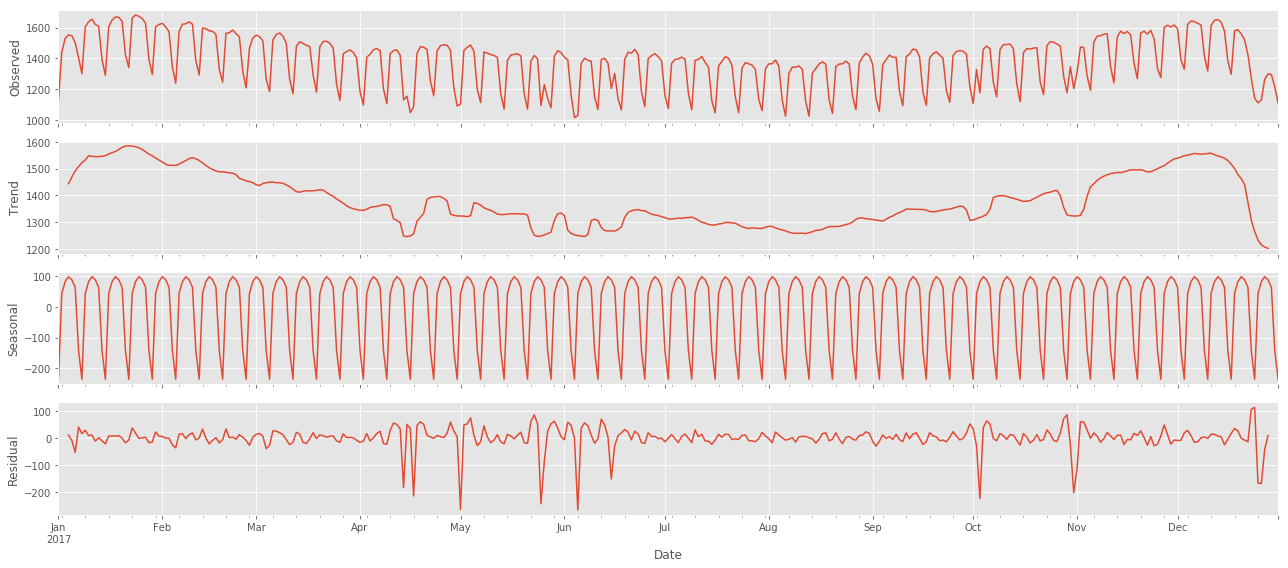

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

fig = decomposition.plot()